# Training a convnet from scratch on a small dataset 

### 1. Loading the data

In [15]:
from keras import models
from keras import layers

In [16]:
# Loading the data. Copying Images to training, validation and test directories

import os, shutil

original_dataset_dir = '/Users/anhpham/Projects/DLWP_Manning/Chapter5/Dogs-vs-Cats'
base_dir = '/Users/anhpham/Projects/DLWP_Manning/Chapter5/Dogs-vs-Cats-small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

# Copies the first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'train', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# Copies the next 500 images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)

# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'train',fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# Same process for dogs data

# Copies the first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'train', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
# Copies the next 500 images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'train', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

# Copies the next 500 dog images to test_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,'train', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

OSError: [Errno 17] File exists: '/Users/anhpham/Projects/DLWP_Manning/Chapter5/Dogs-vs-Cats-small'

In [17]:
# Sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

('total training cat images:', 1000)
('total training dog images:', 1000)


### 2. Building the network
Compared to the MNIST data, this problem has bigger images and more complex; thus, it is useful to use a larger network. This helps augment the capacity of the network and further reduce the size of the feature maps at the same time so they aren't overly large.

Note: the depth of feature maps progressively increases in the network (32 -> 128), whereas the size of the feature maps decreases ( 148x148 -> 7x7 )

Since this is a binary-classification problem, the network should be ended with a single unit (Dense layer of size 1) and a sigmoid activation.



In [18]:
# Instantiating a small convnet for dogs vs cats classification
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))



In [4]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
# Configuring the model for training
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

### 2. Data preprocessing
We need to convert the JPEG files to floating-point tensors before feeding them into the network.

1. Read the picture files
2. Decode the JPEG content to RGB grids of pixels
3. Convert these into floating-point tensors
4. Rescale the pixel values (0-255) to [0,1] interval


In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir, 
                target_size = (150,150), 
                batch_size=20, 
                class_mode ='binary')
# since 'binary_crossentroypy' is to be used, binary labesl is needed

validation_generator =test_datagen.flow_from_directory(
                validation_dir, 
                target_size=(150,150), 
                batch_size=20,
                class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


** Note on Python generators**
A Python generator is an object that acts as an interator


The generator yields the batches of images indefinitely: it loops endlessly over the images in the target forder. Therfore, it is a must to break the iteration loop at some point.



In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

('data batch shape:', (20, 150, 150, 3))
('labels batch shape:', (20,))


Use **fit_generator** method to fit the model to the data using the generator: for its first argument, it expects a Python generator that will yield batches of inputs and targets indefinitely. Since data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over (*steps_per_epoch*). After certain *steps_per_epoch* gradient descent steps - the fitting process will go to the next epoch.  


In [24]:
# Fitting the model using a batch generator

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 170s 2s/step - loss: 0.6927 - acc: 0.5175 - val_loss: 0.6693 - val_acc: 0.5960
Epoch 2/30
100/100 [==============================] - 171s 2s/step - loss: 0.6527 - acc: 0.6180 - val_loss: 0.6745 - val_acc: 0.5800
Epoch 3/30
100/100 [==============================] - 151s 2s/step - loss: 0.6059 - acc: 0.6620 - val_loss: 0.6082 - val_acc: 0.6720
Epoch 4/30
100/100 [==============================] - 144s 1s/step - loss: 0.5668 - acc: 0.7070 - val_loss: 0.5995 - val_acc: 0.6720
Epoch 5/30
100/100 [==============================] - 142s 1s/step - loss: 0.5379 - acc: 0.7220 - val_loss: 0.5864 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 138s 1s/step - loss: 0.5127 - acc: 0.7440 - val_loss: 0.5633 - val_acc: 0.6930
Epoch 7/30
100/100 [==============================] - 142s 1s/step - loss: 0.4854 - acc: 0.7635 - val_loss: 0.5699 - val_acc: 0.6940
Epoch 8/30
100/100 [==============================] - 146s 1s/step - 

In [25]:
# Saving the model
model.save('cats_and_dogs_small_1.h5')


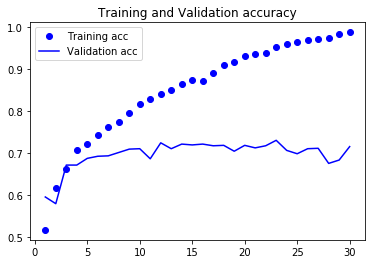

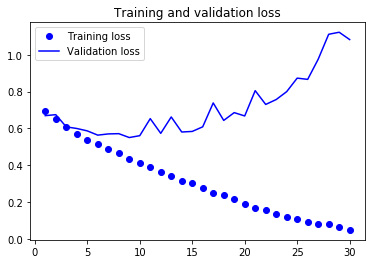

In [27]:
# Ploting loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Using data augmentation 

In this case, we have too few samples and overfitting is likely to occur. Data augmentation makes sure that at training time, the model will never see the exact same picture twice. This helps expose the model to more aspects fo the data and generalize better. 



In [29]:
# Setting up a data augmentation configuration via ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest')



In the chunk of codes above:
- rotation_range: takes the value in degrees (0-180), within which to randomly rotate pictures
- width_shift and height_shift: are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range: for randomly applying shearing transformations
- zoom_range: randomly zooming inside pictures
- horizontal_flip: randomly flipping half the images horizontally - relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures)
- fill_mode: strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift


Let's take a look at some of the augmented images

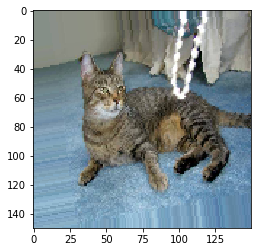

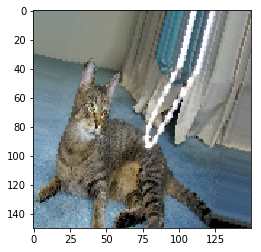

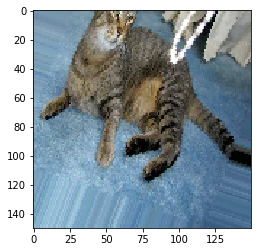

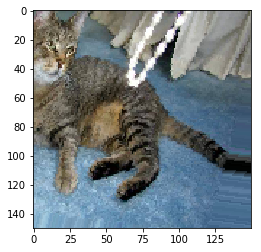

In [30]:
# Displaying some randomly augmented training images
plt.clf()
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size =1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

However, data augmentation cannot produce new information and cannot completely get rid of overfitting. To further fight overfitting, you'll also add a Dropout layer to your model, right before the densely connected classifier. 



In [31]:
# Defining a new convnet that includes dropout

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4),metrics=['acc'])


In [32]:
# Training the convnet using data-augmentation generators

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255) # validation data shouldn't be augmented

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 254s 3s/step - loss: 0.6949 - acc: 0.5084 - val_loss: 0.6862 - val_acc: 0.4987
Epoch 2/100
100/100 [==============================] - 243s 2s/step - loss: 0.6828 - acc: 0.5569 - val_loss: 0.6657 - val_acc: 0.6072
Epoch 3/100
100/100 [==============================] - 220s 2s/step - loss: 0.6715 - acc: 0.5844 - val_loss: 0.6493 - val_acc: 0.6225
Epoch 4/100
100/100 [==============================] - 219s 2s/step - loss: 0.6580 - acc: 0.5969 - val_loss: 0.6255 - val_acc: 0.6491
Epoch 5/100
100/100 [==============================] - 217s 2s/step - loss: 0.6355 - acc: 0.6341 - val_loss: 0.6296 - val_acc: 0.6294
Epoch 6/100
100/100 [==============================] - 219s 2s/step - loss: 0.6237 - acc: 0.6444 - val_loss: 0.6059 - val_acc: 0.6593
Epoch 7/100
100/100 [==============================] - 217s 2s/step - loss: 0.5935 - acc: 0.6784 - val_loss: 0.6

100/100 [==============================] - 214s 2s/step - loss: 0.4205 - acc: 0.8053 - val_loss: 0.4418 - val_acc: 0.7925
Epoch 62/100
100/100 [==============================] - 266s 3s/step - loss: 0.4505 - acc: 0.7903 - val_loss: 0.4252 - val_acc: 0.7963
Epoch 63/100
100/100 [==============================] - 277s 3s/step - loss: 0.4371 - acc: 0.7950 - val_loss: 0.4434 - val_acc: 0.7893
Epoch 64/100
100/100 [==============================] - 279s 3s/step - loss: 0.4350 - acc: 0.8047 - val_loss: 0.4396 - val_acc: 0.7925
Epoch 65/100
100/100 [==============================] - 276s 3s/step - loss: 0.4298 - acc: 0.7987 - val_loss: 0.4477 - val_acc: 0.7855
Epoch 66/100
100/100 [==============================] - 277s 3s/step - loss: 0.4388 - acc: 0.7928 - val_loss: 0.4284 - val_acc: 0.8058
Epoch 67/100
100/100 [==============================] - 274s 3s/step - loss: 0.4345 - acc: 0.7972 - val_loss: 0.4348 - val_acc: 0.7874
Epoch 68/100
100/100 [==============================] - 276s 3s/step

In [33]:
# Saving the model
model.save('cats_and_dogs_small_2.h5')


In [34]:
# Ploting loss and accuracy during training

plt.clf()
au_acc = history.history['acc']
au_val_acc = history.history['val_acc']
au_loss = history.history['loss']
au_val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, au_acc, 'bo', label = 'Training acc')
plt.plot(epochs, au_val_acc, 'b', label = 'Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, au_loss, 'bo', label = 'Training loss')
plt.plot(epochs, au_val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (30,) and (100,)